In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


# So on average, women who have affairs ,rate their marriages lower, so seems they are not stastfied with their marriage , so they went on to affair.

In [14]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


# So as age increase , yrs of married life increase , number of children increase , leads to rate marriege lower.

In [15]:
%matplotlib inline

Text(0,0.5,u'Frequency')

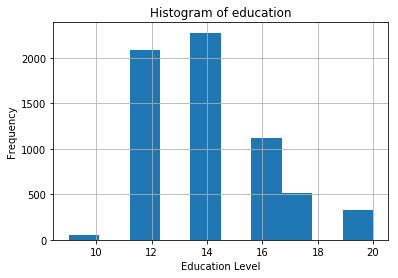

In [19]:
dta.educ.hist();
plt.title("Histogram of education")
plt.xlabel("Education Level")
plt.ylabel("Frequency")

# It is almost bell curve 

Text(0,0.5,u'frequency')

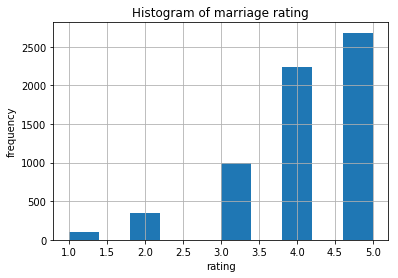

In [22]:
dta.rate_marriage.hist()
plt.title("Histogram of marriage rating")
plt.xlabel("rating")
plt.ylabel("frequency")

Text(0,0.5,u'Freq')

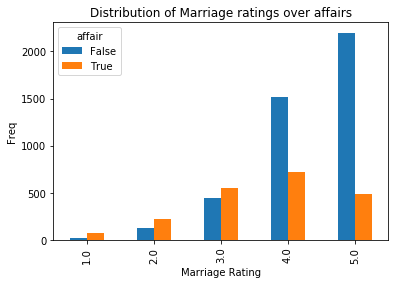

In [24]:
pd.crosstab(dta.rate_marriage,dta.affair.astype(bool)).plot(kind='bar')
plt.title("Distribution of Marriage ratings over affairs")
plt.xlabel("Marriage Rating")
plt.ylabel("Freq")

# Even though their are marriages with good ratings , women have affair in this 

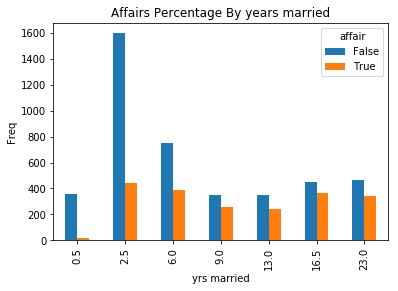

In [32]:
pd.crosstab(dta.yrs_married,dta.affair.astype(bool)).plot(kind='bar');
plt.title('Affairs Percentage By years married');
plt.xlabel("yrs married");
plt.ylabel("Freq");

In [33]:
y

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [36]:
X_train , X_test , Y_train  , Y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
Y_pred = model.predict(X_test)

In [38]:
metrics.accuracy_score(Y_test,Y_pred)

0.72984293193717276

In [39]:
scores = cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)

In [40]:
scores

array([ 0.72100313,  0.70219436,  0.73824451,  0.70597484,  0.70597484,
        0.72955975,  0.7327044 ,  0.70440252,  0.75157233,  0.75      ])

In [41]:
scores.mean()

0.7241630685514876